In [101]:
%matplotlib inline
from operator import itemgetter
from urllib2 import urlopen

%pylab inline
pylab.rcParams['figure.figsize'] = (10, 6)
from datetime import datetime, date, time
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pprint
from collections import Counter

Populating the interactive namespace from numpy and matplotlib


In [87]:
def get_events(directory="./"):
    ''' Parse the events files and return a list of events'''
    events = []
    for filename in os.listdir(directory):
        
        if not filename.startswith("event_"):
            continue
        if filename.startswith("event_log20170318.txt"):
            continue
        year = int(filename[9:13])
        month = int(filename[13:15])
        day = int(filename[15:17])
        d = date(year,month,day)
        with file(filename) as f:
            s = f.read()
        fevents = [ x.split(",") for x in s.splitlines()]
        for fevent in fevents:
            try:
                h = int(fevent[0].split(':')[0])
                m = int(fevent[0].split(':')[1])
                s = int(fevent[0].split(':')[2])
            except IndexError:
                print "Got an odd event in " + filename + " : " + str(fevent)
            t = time(h,m,s)
            fevent[0] = datetime.combine(d, t)
            fevent[5] = float(fevent[5])
            events.append(fevent)
    return events

In [88]:
def plot_duration_histogram(events):
    ''' Plot a histogram of the dration of events '''
    durations = np.array([ x[-1] for x in events]).astype(np.float)
    start = str(min([x[0] for x in events]))
    finish = str(max([x[0] for x in events]))

    fig, ax = plt.subplots()

    ax.hist(durations, 50,log=True)
    ax.set_title('Histogram of Meteor Durations from ' + start + " to " + finish)
    ax.set_xlabel('Duration (s)')
    ax.set_ylabel('Number of counts (log10)')
    fig.tight_layout()
    plt.show()
    

In [173]:

def plot_time_of_day_histogram(events):
    ''' Plot a histogram by hour of the meteor counts'''
    times = np.array([ float(x[0].hour) + float(x[0].minute)/60 for x in events]).astype(np.float)
    start = str(min([x[0] for x in events]))
    finish = str(max([x[0] for x in events]))
    fig, ax = plt.subplots()
    ax.hist(times, 47)
    ax.set_title('Histogram of Meteor counts by hour from ' + start + " to " + finish)
    ax.set_xlabel('Hour of Day (half hour bins)')
    ax.set_ylabel('Number of counts')
    ax.set_xticks(range(0,24), minor=False)

    ax.set_xticklabels(range(0,24), minor=False)

    fig.tight_layout()
    plt.show()
    

In [174]:

def plot_heatmap(events):
    ''' Plot a histogram by hour of the meteor counts'''
    heatdata = {}
    days = set([x[0].date() for x in events])
    for day in days:
        heatdata[day]=[]
        count =  Counter([ x[0].hour for x in events if x[0].date() == day])
        daydata = []
        for hour in range(0,24):
            daydata.append(count[hour])
        heatdata[day]=daydata
    df = pd.DataFrame(data=heatdata).T

    fig, ax = plt.subplots()

    heatmap = ax.pcolor(df)
    cbar = fig.colorbar(heatmap)
    
    fig = plt.gcf()
    
    # put the major ticks at the middle of each cell
    ax.set_yticks(np.arange(df.shape[0]) + 0.5, minor=False)
    ax.set_xticks(np.arange(df.shape[1]) + 0.5, minor=False)

    ax.set_xticklabels(range(0,24), minor=False)
    ax.set_yticklabels(df.index, minor=False)

    for t in ax.xaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    for t in ax.yaxis.get_major_ticks():
        t.tick1On = False
        t.tick2On = False
    ax.set_title('Heatmap of Meteor counts by hour over time.')
    ax.set_xlabel('Hour of Day.')
    ax.set_ylabel('Date.')
    cbar.ax.set_title('# Meteors.')



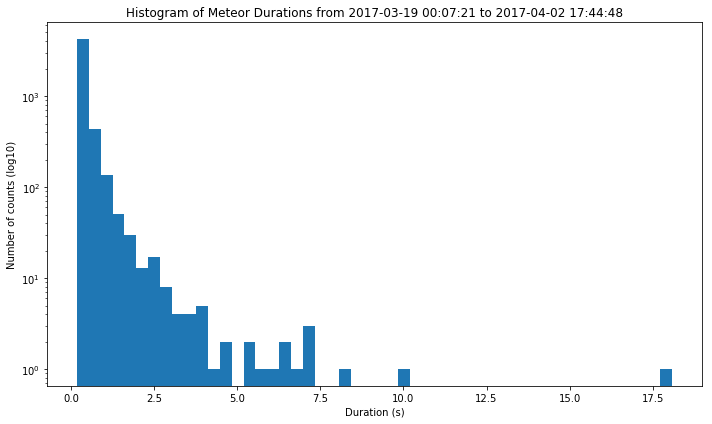

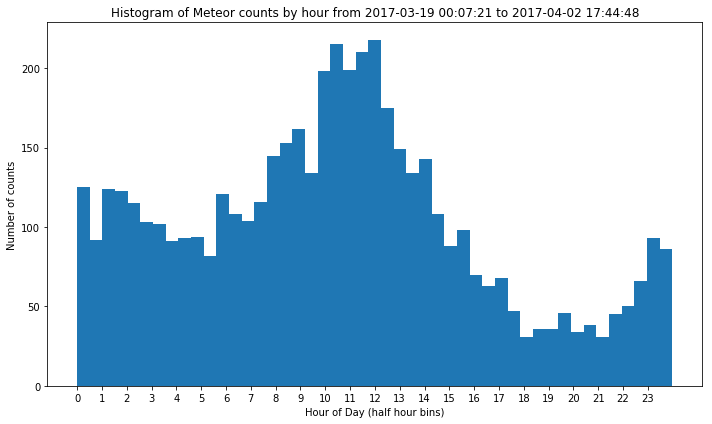

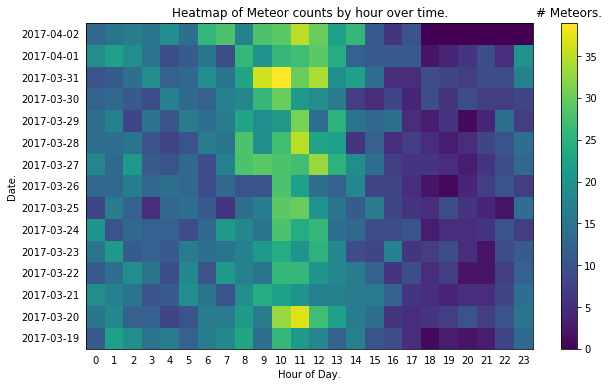

In [175]:
import pprint 
events = get_events()
plot_duration_histogram(events)
plot_time_of_day_histogram(events)
plot_heatmap(events)

In [81]:
# Get the longest meteors
#sorted(events, key=itemgetter(5))[-10:]